# Main imports and code

In [1]:
from urllib import request
import pandas as pd
import logging
import torch
from collections import Counter
from ast import literal_eval
import random
from dont_patronize_me import DontPatronizeMe
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Fetch Don't Patronize Me! data manager module

In [2]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py


In [3]:
# helper function to save predictions to an output file
def labels2file(p, outf_path):
	with open(outf_path,'w') as outf:
		for pi in p:
			outf.write(','.join([str(k) for k in pi])+'\n')

In [4]:
dpm = DontPatronizeMe('./data', './data/task4_test.tsv')

In [5]:
dpm.load_task1()

# Load paragraph IDs

In [6]:
trids = pd.read_csv('./data/train_semeval_parids-labels.csv')
teids = pd.read_csv('./data/dev_semeval_parids-labels.csv')

In [7]:
trids.par_id = trids.par_id.astype(str)
teids.par_id = teids.par_id.astype(str)

In [8]:
data=dpm.train_task1_df

In [9]:
data

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0
...,...,...,...,...,...,...,...
10464,10465,@@14297363,women,lk,"""Sri Lankan norms and culture inhibit women fr...",0,1
10465,10466,@@70091353,vulnerable,ph,He added that the AFP will continue to bank on...,0,0
10466,10467,@@20282330,in-need,ng,""""""" She has one huge platform , and informatio...",1,3
10467,10468,@@16753236,hopeless,in,""""""" Anja Ringgren Loven I ca n't find a word t...",1,4




# Rebuild training set (Task 1)

In [10]:
rows = [] # will contain par_id, label and text
for idx in range(len(trids)):
  parid = trids.par_id[idx]
  #print(parid)
  # select row from original dataset to retrieve `text` and binary label
  keyword = data.loc[data.par_id == parid].keyword.values[0]
  text = data.loc[data.par_id == parid].text.values[0]
  label = data.loc[data.par_id == parid].label.values[0]
  country = data.loc[data.par_id == parid].country.values[0]
  rows.append({
      'par_id':parid,
      'community':keyword,
      'country':country,
      'text':text,
      'label':label
  })


In [11]:
trdf1 = pd.DataFrame(rows)

In [12]:
trdf1

,par_id,community,country,text,label
0,4341,poor-families,gb,"The scheme saw an estimated 150,000 children f...",1
1,4136,homeless,za,Durban 's homeless communities reconciliation ...,1
2,10352,poor-families,lk,The next immediate problem that cropped up was...,1
3,8279,vulnerable,nz,Far more important than the implications for t...,1
4,1164,poor-families,gh,To strengthen child-sensitive social protectio...,1
...,...,...,...,...,...
8370,8380,refugee,gb,Rescue teams search for survivors on the rubbl...,0
8371,8381,hopeless,ke,The launch of ' Happy Birthday ' took place la...,0
8372,8382,homeless,pk,"The unrest has left at least 20,000 people dea...",0
8373,8383,hopeless,pk,You have to see it from my perspective . I may...,0


# Rebuild test set (Task 1)

In [13]:
rows = [] # will contain par_id, label and text
for idx in range(len(teids)):
  parid = teids.par_id[idx]
  #print(parid)
  # select row from original dataset
  keyword = data.loc[data.par_id == parid].keyword.values[0]
  text = data.loc[data.par_id == parid].text.values[0]
  label = data.loc[data.par_id == parid].label.values[0]
  country = data.loc[data.par_id == parid].country.values[0]
  rows.append({
      'par_id':parid,
      'community':keyword,
      'country':country,
      'text':text,
      'label':label
  })


In [14]:
len(rows)

2094

In [15]:
tedf1 = pd.DataFrame(rows)

In [16]:
tedf1

,par_id,community,country,text,label
0,4046,hopeless,us,We also know that they can benefit by receivin...,1
1,1279,refugee,ng,Pope Francis washed and kissed the feet of Mus...,1
2,8330,refugee,ng,Many refugees do n't want to be resettled anyw...,1
3,4063,in-need,ie,"""Budding chefs , like """" Fred """" , """" Winston ...",1
4,4089,homeless,pk,"""In a 90-degree view of his constituency , one...",1
...,...,...,...,...,...
2089,10462,homeless,gh,"The sad spectacle , which occurred on Saturday...",0
2090,10463,refugee,pk,""""""" The Pakistani police came to our house and...",0
2091,10464,disabled,ie,"""When Marie O'Donoghue went looking for a spec...",0
2092,10465,women,lk,"""Sri Lankan norms and culture inhibit women fr...",0


# Data analysis

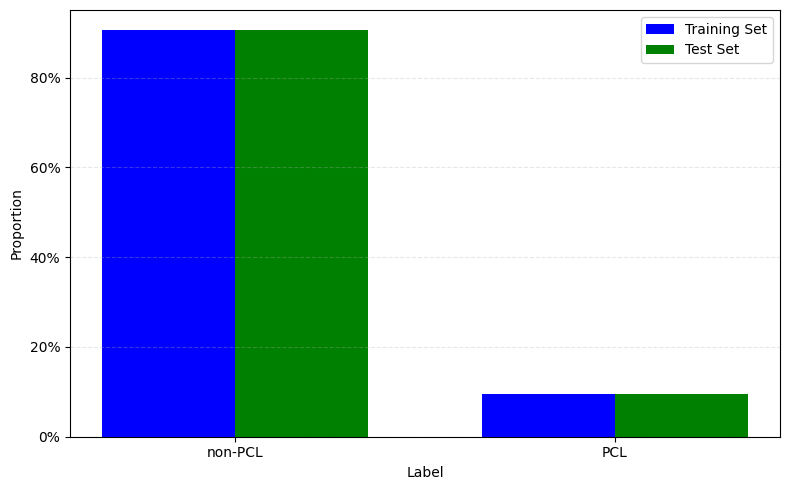

In [17]:
# Create a single figure
plt.figure(figsize=(8, 5))

# Get value counts
train_counts = trdf1['label'].value_counts()
test_counts = tedf1['label'].value_counts()

# Convert to proportions
train_dist = train_counts / train_counts.sum()
test_dist = test_counts / test_counts.sum()

# Make sure both series have the same index (labels)
all_labels = sorted(list(set(train_dist.index) | set(test_dist.index)))
train_dist = train_dist.reindex(all_labels, fill_value=0)
test_dist = test_dist.reindex(all_labels, fill_value=0)

# Create a mapping for labels
label_names = {0: "non-PCL", 1: "PCL"}

# Set up bar positions
x = np.arange(len(all_labels))
width = 0.35  # Width of the bars

# Plot bars side by side
plt.bar(x - width/2, train_dist, width, color='blue', label='Training Set')
plt.bar(x + width/2, test_dist, width, color='green', label='Test Set')

# Add labels and legend
plt.xlabel('Label')
plt.ylabel('Proportion')

# Use custom label names for x-ticks
plt.xticks(x, [label_names[label] for label in all_labels])
plt.legend()

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))

plt.tight_layout()
plt.show()

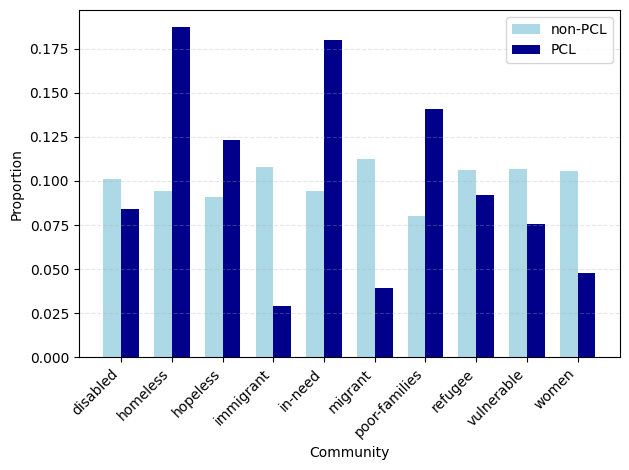

In [18]:
# Plot community distribution proportions for training set

# Sort the community column
trdf1['community'] = trdf1['community'].astype(str).str.lower()
tedf1['community'] = tedf1['community'].astype(str).str.lower()

# Get value counts and normalize to get proportions
train_counts = trdf1[trdf1['label'] == 0]['community'].value_counts(normalize=True).sort_index()
test_counts = trdf1[trdf1['label'] == 1]['community'].value_counts(normalize=True).sort_index()

# Make sure both series have the same index (communities)
all_communities = sorted(list(set(train_counts.index) | set(test_counts.index)))
train_counts = train_counts.reindex(all_communities, fill_value=0)
test_counts = test_counts.reindex(all_communities, fill_value=0)

# Set up bar positions
x = np.arange(len(all_communities))
width = 0.35  # Width of the bars

# Plot bars side by side with proportions
plt.bar(x - width/2, train_counts, width, color='lightblue', label='non-PCL')
plt.bar(x + width/2, test_counts, width, color='darkblue', label='PCL')

# Add labels and legend
plt.xlabel('Community')
plt.ylabel('Proportion')
plt.xticks(x, all_communities, rotation=45, ha='right')
plt.legend()

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
# One-hot encode the communities in the training set
trdf1_encoded = pd.get_dummies(trdf1, columns=['community'])

# One-hot encode the communities in the test set
tedf1_encoded = pd.get_dummies(tedf1, columns=['community'])

# Ensure both dataframes have the same columns
trdf1_encoded, tedf1_encoded = trdf1_encoded.align(tedf1_encoded, join='outer', axis=1, fill_value=0)



In [20]:
trdf1_encoded['text_size'] = trdf1['text'].apply(len)
tedf1_encoded['text_size'] = tedf1['text'].apply(len)

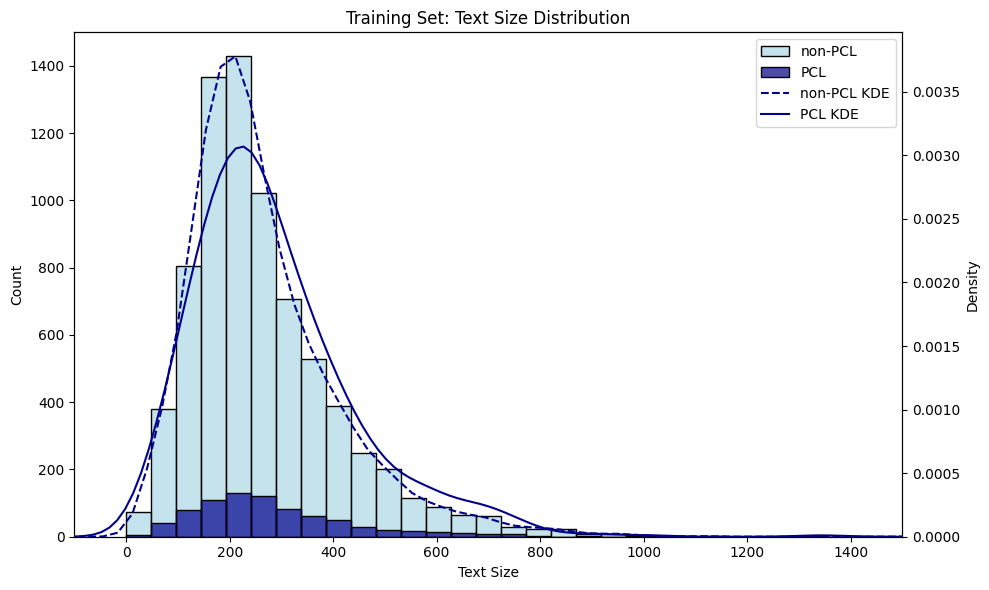

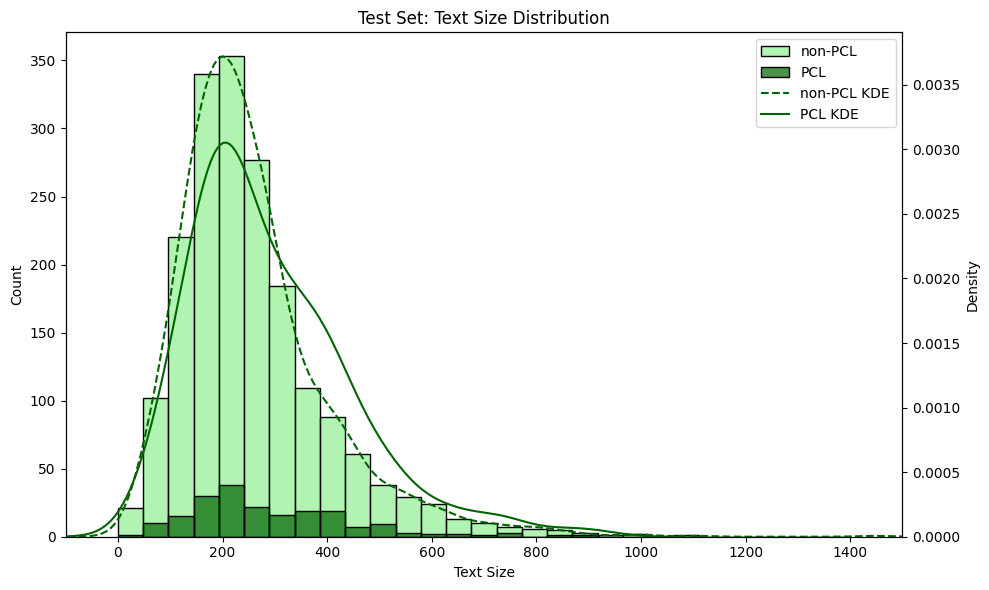

In [37]:
bins = np.linspace(0, 1400, 30)

# Training set plot
# Filter data by label
train_label0 = trdf1_encoded[trdf1_encoded['label'] == 0]['text_size']
train_label1 = trdf1_encoded[trdf1_encoded['label'] == 1]['text_size']

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot histograms on primary y-axis
sns.histplot(train_label0, bins=bins, kde=False, color='lightblue', alpha=0.7, 
             label='non-PCL', ax=ax1)
sns.histplot(train_label1, bins=bins, kde=False, color='darkblue', alpha=0.7, 
             label='PCL', ax=ax1)

ax1.set_xlabel('Text Size')
ax1.set_ylabel('Count')
ax1.set_xlim(-100, 1500)

# Create secondary y-axis for KDE
ax2 = ax1.twinx()

# Plot KDEs on secondary y-axis
sns.kdeplot(train_label0, color='darkblue', linestyle='--', ax=ax2, label='non-PCL KDE')
sns.kdeplot(train_label1, color='darkblue', ax=ax2, label='PCL KDE')

ax2.set_ylabel('Density')

# Create combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Training Set: Text Size Distribution')
plt.tight_layout()

# Test set plot
# Filter data by label
test_label0 = tedf1_encoded[tedf1_encoded['label'] == 0]['text_size']
test_label1 = tedf1_encoded[tedf1_encoded['label'] == 1]['text_size']

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot histograms on primary y-axis
sns.histplot(test_label0, bins=bins, kde=False, color='lightgreen', alpha=0.7, 
             label='non-PCL', ax=ax1)
sns.histplot(test_label1, bins=bins, kde=False, color='darkgreen', alpha=0.7, 
             label='PCL', ax=ax1)

ax1.set_xlabel('Text Size')
ax1.set_ylabel('Count')
ax1.set_xlim(-100, 1500)
# Create secondary y-axis for KDE
ax2 = ax1.twinx()

# Plot KDEs on secondary y-axis
sns.kdeplot(test_label0, color='darkgreen', ax=ax2, linestyle='--', label='non-PCL KDE')
sns.kdeplot(test_label1, color='darkgreen', ax=ax2, label='PCL KDE')

ax2.set_ylabel('Density')

# Create combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Test Set: Text Size Distribution')
plt.tight_layout()
plt.show()

In [22]:
trdf1_encoded.drop(columns=['par_id','text', 'country'], inplace=True)
tedf1_encoded.drop(columns=['par_id','text', 'country'], inplace=True)


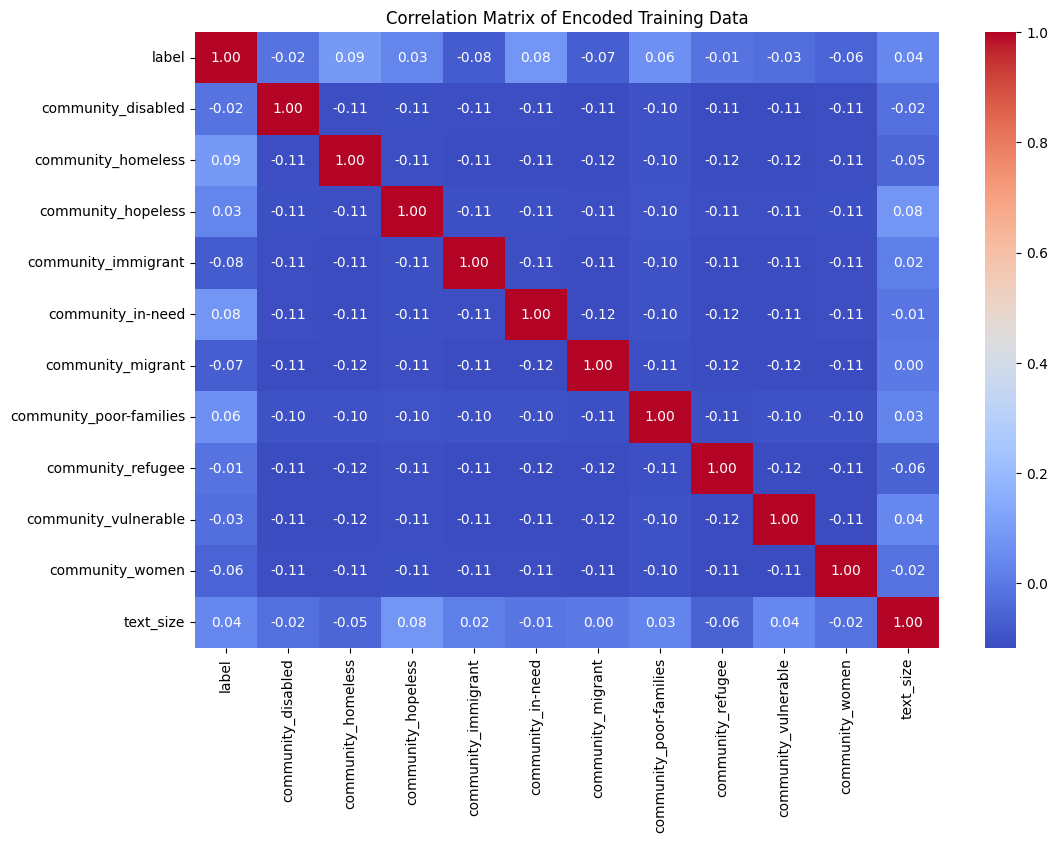

In [23]:
# Compute the correlation matrix
corr_matrix = trdf1_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Encoded Training Data')
plt.show()

In [24]:
trdf1

,par_id,community,country,text,label
0,4341,poor-families,gb,"The scheme saw an estimated 150,000 children f...",1
1,4136,homeless,za,Durban 's homeless communities reconciliation ...,1
2,10352,poor-families,lk,The next immediate problem that cropped up was...,1
3,8279,vulnerable,nz,Far more important than the implications for t...,1
4,1164,poor-families,gh,To strengthen child-sensitive social protectio...,1
...,...,...,...,...,...
8370,8380,refugee,gb,Rescue teams search for survivors on the rubbl...,0
8371,8381,hopeless,ke,The launch of ' Happy Birthday ' took place la...,0
8372,8382,homeless,pk,"The unrest has left at least 20,000 people dea...",0
8373,8383,hopeless,pk,You have to see it from my perspective . I may...,0


In [25]:
trdf1.to_csv('./data/training.tsv',sep='\t',index=False)
tedf1.to_csv('./data/dev.tsv',sep='\t',index=False)

In [26]:
dpm.load_test()
data_test = dpm.test_set_df

In [27]:
data_test.drop(columns=['art_id'], inplace=True)

In [28]:
data_test

,par_id,keyword,country,text
0,t_0,vulnerable,us,"In the meantime , conservatives are working to..."
1,t_1,women,pk,In most poor households with no education chil...
2,t_2,migrant,ca,The real question is not whether immigration i...
3,t_3,migrant,gb,"In total , the country 's immigrant population..."
4,t_4,vulnerable,ca,"Members of the church , which is part of Ken C..."
...,...,...,...,...
3827,t_3893,migrant,jm,In a letter dated Thursday to European Commiss...
3828,t_3894,poor-families,au,They discovered that poor families with health...
3829,t_3895,migrant,ca,"She married at 19 , to Milan ( Emil ) Badovina..."
3830,t_3896,immigrant,us,The United Kingdom is n't going to devolve int...


In [29]:
data_test.to_csv('./data/test.tsv',sep='\t',index=False)